<a href="https://colab.research.google.com/github/tciodaro/GRLCDDR1C1-N2-L2-PB/blob/main/projeto_tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:

import pandas as pd
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import model_selection
from sklearn import metrics

fname = 'drive/MyDrive/Curso Projeto de Bloco: Inteligência Artificial e Machine Learning (GRLCDDR1C1-N2-L2)/dataset_vinhos.csv'

feature_list = [
    'fixed acidity',
    'volatile acidity',
    'residual sugar',
    'alcohol',
    'pH',
    'type_coded'

]

type_map = {
    'red': 0,
    'white': 1,
}


In [18]:

wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target', 'target_label', 'type'],
      dtype='object')

# Carga dos Dados

In [3]:
wine = pd.read_csv(fname, sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,target_label,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,baixa qualidade,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,baixa qualidade,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,baixa qualidade,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,alta qualidade,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0,baixa qualidade,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,alta qualidade,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,baixa qualidade,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,alta qualidade,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,alta qualidade,white


# Pré-processamentos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,target_label,type_coded,red,white
2551,7.9,0.20,0.34,1.2,0.040,29.0,118.0,0.99320,3.14,0.41,10.600000,1,alta qualidade,1,False,True
5319,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.800000,1,alta qualidade,1,False,True
2983,7.2,0.47,0.65,8.3,0.083,27.0,182.0,0.99640,3.00,0.35,9.200000,0,baixa qualidade,1,False,True
4901,5.2,0.22,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,0,baixa qualidade,1,False,True
3844,8.4,0.22,0.30,8.9,0.024,17.0,118.0,0.99456,2.99,0.34,10.500000,1,alta qualidade,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,7.5,0.19,0.49,1.6,0.047,42.0,140.0,0.99320,3.40,0.47,10.700000,1,alta qualidade,1,False,True
4382,4.7,0.67,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.600000,0,baixa qualidade,1,False,True
1763,6.2,0.18,0.38,1.5,0.028,36.0,117.0,0.99300,3.47,0.54,9.700000,1,alta qualidade,1,False,True
2393,6.8,0.32,0.37,3.4,0.023,19.0,87.0,0.99020,3.14,0.53,12.700000,1,alta qualidade,1,False,True


In [59]:
# divisao treino / validacao

xtrn, xtst = model_selection.train_test_split(wine, test_size=0.2, stratify=wine['target'])

print(xtrn.shape)
print(xtst.shape)

xtrn['type_coded'] = xtrn['type'].map(type_map)
xtst['type_coded'] = xtst['type'].map(type_map)
# Podemos transformar type em variavel dummy
# xcat = pd.get_dummies(xtrn['type'])
# pd.concat((xtrn.drop(columns='type'), xcat), axis=1)

scaler = preprocessing.StandardScaler()
scaler = scaler.fit(xtrn[feature_list])
normed_trn = scaler.transform(xtrn[feature_list])
normed_tst = scaler.transform(xtst[feature_list])


(4256, 14)
(1064, 14)


# Treinamento

In [60]:

n_neighbors_list = [3,5,7,9,11,13, 15, 17, 19, 21, 23]
weights_list = ['distance'] # 'uniform'

results = []

for n in n_neighbors_list:
  for w in weights_list:

    knn = neighbors.KNeighborsClassifier(
        n_neighbors=n,
        weights = w,
        metric='minkowski'
    )
    knn = knn.fit(normed_trn, xtrn['target'])
    # Avaliar treino
    ytrn = knn.predict_proba(normed_trn)[:,1]
    acc_trn = metrics.accuracy_score(y_pred=ytrn > 0.5, y_true = xtrn['target'])
    prec_trn = metrics.precision_score(y_pred=ytrn > 0.5, y_true = xtrn['target'])
    # Avaliar teste
    ytst = knn.predict_proba(normed_tst)[:,1]
    acc_tst = metrics.accuracy_score(y_pred=ytst > 0.5, y_true = xtst['target'])
    prec_tst = metrics.precision_score(y_pred=ytst > 0.5, y_true = xtst['target'])

    # Guardar resultados em dicionario
    results.append({
        'n_neighbors': n,
        'weights': w,
        'acc_trn': acc_trn,
        'acc_tst': acc_tst,
        'prec_trn': prec_trn,
        'prec_tst': prec_tst
    })
results = pd.DataFrame().from_dict(results)

In [43]:
results

,n_neighbors,weights,acc_trn,acc_tst,prec_trn,prec_tst
0,3,distance,0.999765,0.697368,1.0,0.753687
1,5,distance,0.999765,0.695489,1.0,0.749271
2,7,distance,0.999765,0.707707,1.0,0.753934
3,9,distance,0.999765,0.714286,1.0,0.759312
4,11,distance,0.999765,0.716165,1.0,0.763768
5,13,distance,0.999765,0.710526,1.0,0.760933
6,15,distance,0.999765,0.714286,1.0,0.764620
7,17,distance,0.999765,0.716165,1.0,0.765306
8,19,distance,0.999765,0.718045,1.0,0.765988
9,21,distance,0.999765,0.718045,1.0,0.764451


In [44]:
knn = neighbors.KNeighborsClassifier(
      n_neighbors=23,
      weights = 'distance',
      metric='minkowski'
)
knn = knn.fit(normed_trn, xtrn['target'])

In [47]:
cm = metrics.confusion_matrix(y_pred=knn.predict(normed_tst), y_true = xtst['target'])

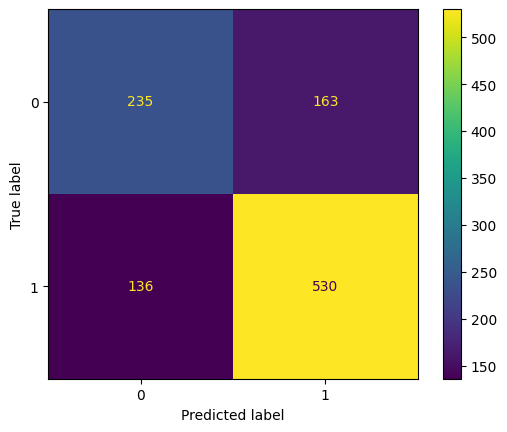

In [49]:
    metrics.ConfusionMatrixDisplay(cm).plot()

In [50]:
530 / (530 + 163)

0.7647907647907648

In [51]:
530 / (530 + 136)

0.7957957957957958